# Re-programming to Python of LLM- and Chatbook packages

## Introduction

In this computational document (converted into a Markdown and/or blog post) I would like to proclaim my efforts to re-program the Large Language Models (LLM) 
Raku packages into Python packages. 


I heavily borrowed use case ideas and functionality designs from LLM works of Wolfram Research, Inc. (WRI), see [SW1, SW2]. 
Hence, opportunistically, I am also going to include comparisons with Wolfram Language (WL) (aka Mathematica.)

## Why doing this?

Here is a list of reasons why I did the Raku-to-Python reprogramming:

- I am mostly doing that kind re-programmings for getting new perspectives and -- more importantly -- to review and evaluate the underlying software architecture of the packages.
  - Generally speaking, my Raku packages are not used by others much, hence re-programming to any other language is a fairly good way to review and evaluate them.
- Since I, sort of, "do not care" about Python, I usually try to make only "advanced" Minimal Viable Products (MVPs) in Python. 
    - Hence, the brainstorming perspective of removing "the fluff" from the Raku packages.
- Of course, an "advanced MVP" has a set of fairly useful functionalities. 
  - If the scope of the package is small, I can make its Python translation as advanced (or better) than the corresponding Raku package.
- Good, useful documentation is essential, hence:
  - I usually write "complete enough" (often "extensive") documentation of the Raku packages I create and publish.
  - The Raku documentation is of course a good start for the corresponding Python documentation.
    - ...and a way to review and evaluate it.
- In the re-programming of the Raku LLM packages, I used a Raku Jupyter Chatbook for translation of Raku code into Python code.
  - In other words: I used LLMs to reprogram LLM interaction software.
  - That, of course, is a typical application of the principle ["eat your own dog food."](https://en.wikipedia.org/wiki/Eating_your_own_dog_food)
- I also used a Raku chatbook to write the Python-centric article "Workflows with LLM functions", [AAn3py].
- The "data package" ["LLM::Prompts"](https://raku.land/zef:antononcube/LLM::Prompts) provides ≈200 prompts -- it is beneficial to have those prompts in other programming languages.
  - The usefulness of chat cells in chatbooks is greatly enhanced with the prompt expansion provided by "LLM::Prompts", [AAv2].
  - It was instructive to reprogram into Python the corresponding Domain Specific Language (DSL) for prompt specifications.
    - Again, an LLM interaction in a chatbook was used to speed-up the re-programming.

### Article structure

- **Big picture use case warm-up**   
    Mind-map for LLMs and flowchart for chatbooks
- **Tabulated comparisons**   
    Quicker overview, clickable entries
- **LLM functions examples**  
    Fundamental in order to "manage" LLMs
- **LLM prompts examples**  
    Tools for pre-conditioning and bias (of LLMs)
- **Chatbook multi-cell chats**   
    Must have for LLMs
- **Observations, remarks, and conclusions**   
    Could be used to start the article with...
- **Future plans**  
    Missing functionalities 

------

## Big picture warm-up

### Mind-map

Here is a mind-map aimed at assisting in understanding and evaluating the discussed LLM functionalities in this document:


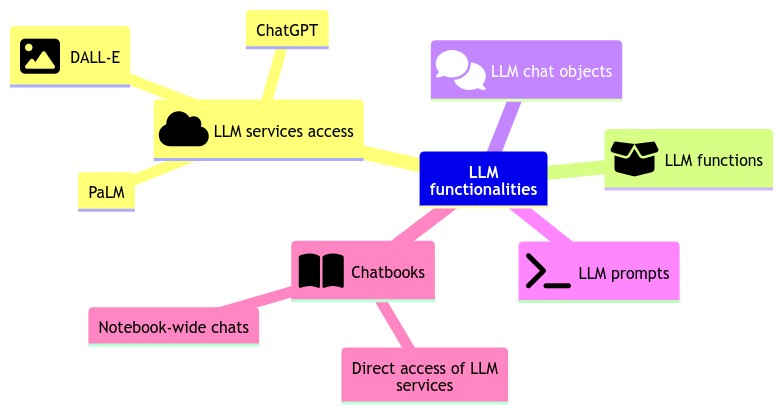

In [25]:
#% mermaid
mindmap
    **LLM<br/>functionalities**
        LLM services access
        ::icon(fa fa-cloud)
            ChatGPT
            DALL-E
            ::icon(fas fa-image)
            PaLM

        LLM functions
        ::icon(fas fa-box-open)

        LLM chat objects
        ::icon(fa fa-comments)

        LLM prompts
        ::icon(fa fa-terminal)

        Chatbooks
        ::icon(fa fa-book-open)
            Direct access of LLM services
            Notebook-wide chats


### Primary use case 

A ***primary use case*** for LLMs in Raku is the following:

> A Raku "chat notebook solution" -- ***chatbook*** -- that allows convenient access to LLM services and facilitates multiple multi-cell chat-interactions with LLMs.

***We are interested in other types of workflows, but they would be either readily available or easy to implement if the primary use case is developed, tested, and documented.***

An expanded version of the use-case formulation can be as follows:

> The Raku chatbook solution aims to provide a user-friendly interface for interacting with LLM (Language Model) services and offers seamless integration for managing multiple multi-cell chats with LLMs. The key features of this solution include:
>
> 1. **Direct Access to LLM Services:**   
    The notebook solution provides a straightforward way to access LLM services without the need for complex setup or configuration. Users can easily connect to their preferred LLM service provider and start utilizing their language modeling capabilities.
>
> 2. **Easy Creation of Chat Objects:**   
    The solution allows users to effortlessly create chat objects within the notebook environment. These chat objects serve as individual instances for conducting conversations with LLMs and act as containers for storing chat-related information.
>
> 3. **Simple Access and Invocation of Chat Cells:**   
    Users can conveniently access and invoke chat cells within the notebook solution. Chat cells represent individual conversation steps or inputs given to the LLM. Users can easily interact with the LLM by adding, modifying, or removing chat cells.
>
> 4. **Native Support for Multi-Cell Chats:**    
    The notebook solution offers native support for managing multi-cell chats per chat object. Users can organize their conversations into multiple cells, making it easier to structure and navigate through complex dialogues. The solution ensures that the context and history of each chat object are preserved throughout



Here is a flowchart that outlines the solution derived with the Raku LLM packages discussed below:


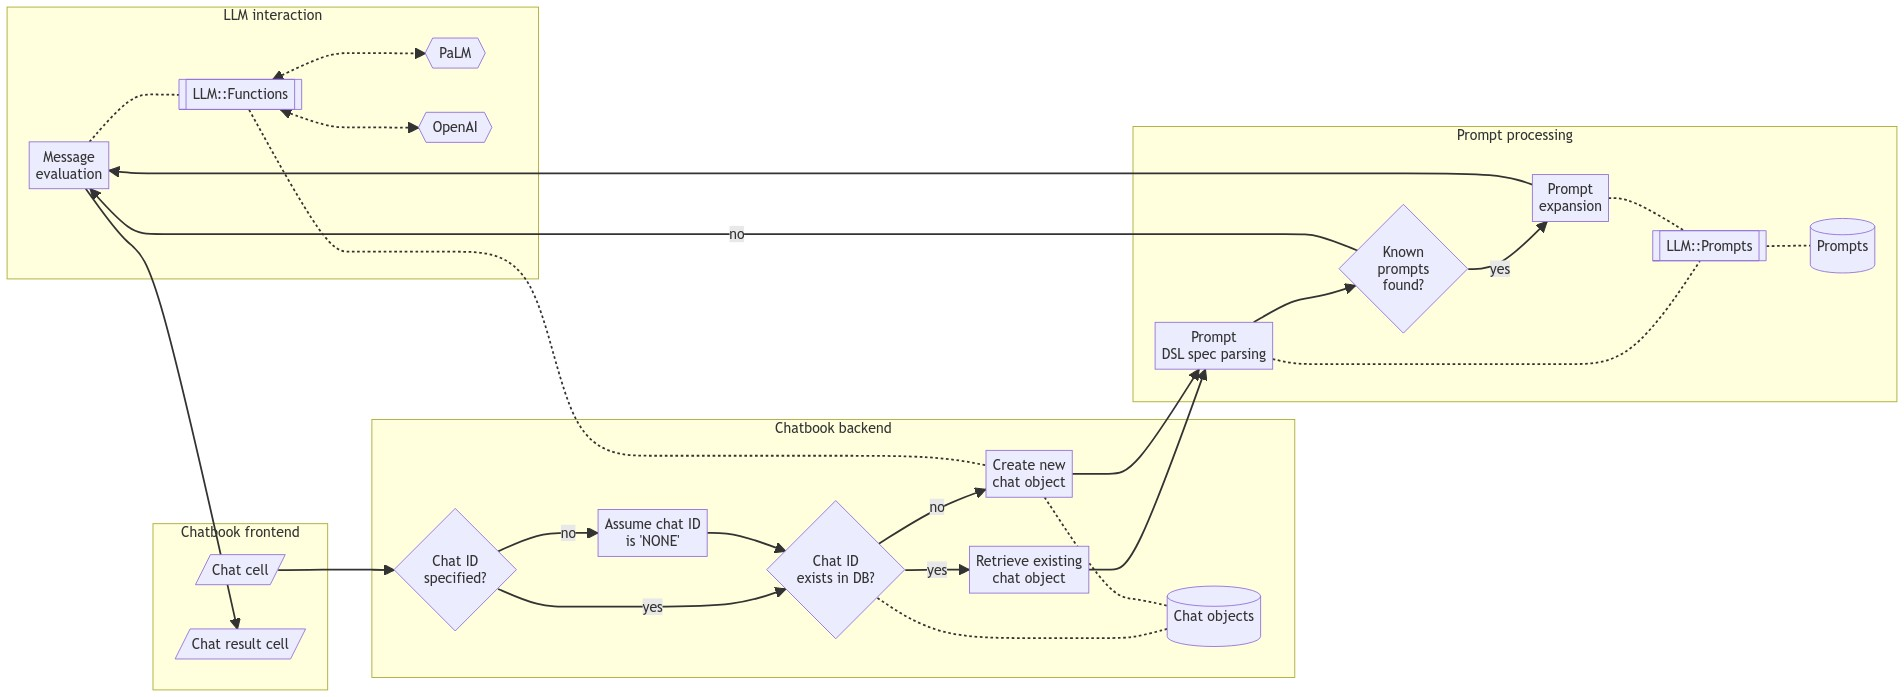

In [2]:
#% mermaid
flowchart LR
    OpenAI{{OpenAI}}
    PaLM{{PaLM}}
    LLMFunc[[LLM::Functions]]
    LLMProm[[LLM::Prompts]]
    CODB[(Chat objects)]
    PDB[(Prompts)]
    CCell[/Chat cell/]
    CRCell[/Chat result cell/]
    CIDQ{Chat ID<br/>specified?}
    CIDEQ{Chat ID<br/>exists in DB?}
    RECO[Retrieve existing<br/>chat object]
    COEval[Message<br/>evaluation]
    PromParse[Prompt<br/>DSL spec parsing]
    KPFQ{Known<br/>prompts<br/>found?}
    PromExp[Prompt<br/>expansion]
    CNCO[Create new<br/>chat object]
    CIDNone["Assume chat ID<br/>is 'NONE'"] 
    subgraph Chatbook frontend    
        CCell
        CRCell
    end
    subgraph Chatbook backend
        CIDQ
        CIDEQ
        CIDNone
        RECO
        CNCO
        CODB
    end
    subgraph Prompt processing
        PDB
        LLMProm
        PromParse
        KPFQ
        PromExp 
    end
    subgraph LLM interaction
      COEval
      LLMFunc
      PaLM
      OpenAI
    end
    CCell --> CIDQ
    CIDQ --> |yes| CIDEQ
    CIDEQ --> |yes| RECO
    RECO --> PromParse
    COEval --> CRCell
    CIDEQ -.- CODB
    CIDEQ --> |no| CNCO
    LLMFunc -.- CNCO -.- CODB
    CNCO --> PromParse --> KPFQ
    KPFQ --> |yes| PromExp
    KPFQ --> |no| COEval
    PromParse -.- LLMProm 
    PromExp -.- LLMProm
    PromExp --> COEval 
    LLMProm -.- PDB
    CIDQ --> |no| CIDNone
    CIDNone --> CIDEQ
    COEval -.- LLMFunc
    LLMFunc <-.-> OpenAI
    LLMFunc <-.-> PaLM

The flowchart represents the process for handling chat requests in the Raku chat notebook solition ["Jupyter::Chatbook"](https://raku.land/zef:antononcube/Jupyter::Chatbook), [AAp4p6]. 
(Also, for Python's ["JupyterChatbook"](https://pypi.org/project/JupyterChatbook/), [AAp4py].)

1. When a chat request is received, the system checks if a Chat IDentifier (Chat ID) is specified.   
    - If it is, the system verifies if the Chat ID exists in the Chat Objects Database (CODB). 
    - If the Chat ID exists, the system retrieves the existing chat object from the database. 
    - Otherwise, a new chat object is created.

2. Next, the system parses the DSL spec of the prompt, which defines the structure and behavior of the desired response.   
    - The parsed prompt spec is then checked against the Known Prompts Database (PDB) to determine if any known prompts match the spec. 
    - If a match is found, the prompt is expanded, modifying the behavior or structure of the response accordingly.

3. Once the prompt is processed, the system evaluates the chat message using the underlying LLM function. 
    - This involves interacting with the OpenAI and PaLM models. 
    - The LLM function generates a response based on the chat message and the prompt.

4. The generated response is then displayed in the Chat Result Cell (CRCell) in the chat interface. 
    - The system also updates the Chat Objects Database (CODB) to store the chat history and other relevant information.

Throughout this process, various components such as the frontend interface, backend logic, prompt processing, and LLM interaction work together to provide an interactive chat experience in the *chatbook*.

**Remark:** The flowchart and explanations are also relevant to a large degree for WL's chatbook solution, [SW2.]

------

## Tabulated comparisons

In this section we put into tables corresponding packages of Raku, Python, Wolfram Language. Similarly, corresponding demonstration videos are also tabulated.

### Primary LLM packages

We can say that the Raku packages 
["LLM::Functions"](https://raku.land/zef:antononcube/LLM::Functions) and 
["LLM::Prompts"](https://raku.land/zef:antononcube/LLM::Prompts) 
adopted the LLM designs by Wolfram Research, Inc. (WRI);
see [SW1, SW2].

Here is a table with links to:
- "Primary" LLM Raku packages
- Corresponding Python packages
- Corresponding Wolfram Language (WL) paclets and prompt repository

| What?                | Raku                      | Python                  | WL                                        |
|----------------------|---------------------------|-------------------------|-------------------------------------------|
| OpenAI access        | [WWW::OpenAI][]           | [openai][]              | [OpenAILink][]                            |
| PaLM access          | [WWW::PaLM][]             | [google-generativeai][] | [PaLMLink][]                              |
| LLM functions        | [LLM::Functions][]        | [LLMFunctionObjects][]  | [LLMFunctions][WL-LLMFunctions]           |
| LLM prompts          | [LLM::Prompts][]          | [LLMPrompts][]          | [Wolfram Prompt Repostory][WPR]           |
| Chatbook             | [Jupyter::Chatbook][]     | [JupyterChatbook][]     | [Chatbook][WL-Chatbook]                   | 
| Find textual answers | [ML::FindTextualAnswer][] | [LLMFunctionObjects][]  | [FindTextualAnswer][WL-FindTextualAnswer] |

[WWW::OpenAI]: https://raku.land/zef:antononcube/WWW::OpenAI
[openai]: https://pypi.org/project/openai/
[OpenAILink]: https://resources.wolframcloud.com/PacletRepository/resources/ChristopherWolfram/OpenAILink/

[WWW::PaLM]: https://raku.land/zef:antononcube/WWW::PaLM
[google-generativeai]: https://pypi.org/project/google-generativeai/
[PaLMLink]: https://resources.wolframcloud.com/PacletRepository/resources/AntonAntonov/PaLMLink/

[LLM::Functions]: https://raku.land/zef:antononcube/LLM::Functions
[LLMFunctionObjects]: https://pypi.org/project/LLMFunctionObjects
[WL-LLMFunctions]: https://resources.wolframcloud.com/PacletRepository/resources/Wolfram/LLMFunctions/

[LLM::Prompts]: https://raku.land/zef:antononcube/LLM::Prompts
[LLMPrompts]: https://pypi.org/project/LLMPrompts
[WPR]: https://resources.wolframcloud.com/PromptRepository/

[Jupyter::Chatbook]: https://raku.land/zef:antononcube/Jupyter::Chatbook
[JupyterChatbook]: https://pypi.org/project/JupyterChatbook
[WL-Chatbook]: https://resources.wolframcloud.com/PacletRepository/resources/Wolfram/Chatbook/

[ML::FindTextualAnswer]: https://raku.land/zef:antononcube/ML::FindTextualAnswer
[WL-FindTextualAnswer]: https://reference.wolfram.com/language/ref/FindTextualAnswer.html

**Remark:** There is a plethora of Python packages dealing with LLM and extending 
Jupyter notebooks with LLM services access.

**Remark:** Finding of Textual Answers (FTAs) was primary motivator to implement the Raku package "LLM::Functions". FTA is a fundamental functionality for the [NLP Template Engine](https://github.com/antononcube/NLP-Template-Engine) used to generate *correct*, executable code for different computational sub-cultures. See [AApwl1, AAv5].

### Secondary LLM packages 

The "secondary" LLM Raku packages -- inspired from working with the "primary" LLM packages -- are
["Text::SubParsers"](https://raku.land/zef:antononcube/Text::SubParsers) and
["Data::Translators"](https://raku.land/zef:antononcube/Data::Translators).

Also, while using LLMs, conveniently and opportunistically is used the package ["Data::TypeSystem"](https://raku.land/zef:antononcube/Data::TypeSystem).

Here is a table of the Raku-Python correspondence:

| Post processing of LLM results   | Raku                      | Python                         | WL                     |
|----------------------------------|---------------------------|--------------------------------|------------------------|
| Extracting text elements         | [Text::SubParsers][]      | part of [LLMFunctionObjects][] | -                      |
| Shapes and types                 | [Data::TypeSystem][]      | [DataTypeSystem][]             | -                      |
| Converting to texts formats      | [Data::Translators][]     | -                              | -                      | 
| Magic arguments parsing          | [Getopt::Long::Grammar][] | [argparse][]                   | -                      |
| Copy to clipboard                | [Clipboard][]             | [pyperclip][] et al.           | [CopyToClipboard][WL-CopyToClipboard] |

[Text::SubParsers]: https://raku.land/zef:antononcube/Text::SubParsers
[Data::Translators]: https://raku.land/zef:antononcube/Data::Translators
[Data::TypeSystem]: https://raku.land/zef:antononcube/Data::TypeSystem
[Getopt::Long::Grammar]: https://raku.land/zef:antononcube/Getopt::Long::Grammar
[Clipboard]: https://raku.land/zef:antononcube/Clipboard

[LLMFunctionObjects]: https://pypi.org/project/LLMFunctionObjects
[DataTypeSystem]: https://pypy.org/project/DataTypeSystem
[argparse]: https://docs.python.org/3/library/argparse.html
[pyperclip]: https://pypi.org/project/pyperclip/

[WL-CopyToClipboard]: https://reference.wolfram.com/language/ref/CopyToClipboard.html

### Introductory videos

Here is a table of introduction and guide videos for using chatbooks:

| What | Raku | Python | WL   |
|------|------|--------|------|
| Direct LLM<br>services access | [Jupyter Chatbook LLM cells demo (Raku)][v1]<br>(5 min)| [Jupyter Chatbook LLM cells demo (Python)][v2]<br>(4.8 min) | [OpenAIMode demo (Mathematica)][v3]<br>(6.5 min) |
| Multi-cell chat | [Jupyter Chatbook multi cell LLM chats teaser (Raku)][v4]<br>(4.2 min) | [Jupyter Chatbook multi cell LLM chats teaser (Python)][v5]<br>(4.5 min) | [Chat Notebooks bring the power of Notebooks to LLMs][v6]<br>(57 min) |

[v1]: https://www.youtube.com/watch?v=cICgnzYmQZg
[v2]: https://youtu.be/WN3N-K_Xzz8
[v3]: https://www.youtube.com/watch?v=htUIOqcS9uA
[v4]: https://www.youtube.com/watch?v=wNpIGUAwZB8
[v5]: https://www.youtube.com/watch?v=8pv0QRGc7Rw
[v6]: https://www.youtube.com/watch?v=e11ePElnqRE


------

## LLM functions

In this section we show examples of creation and invocation of LLM functions.

Because the name "LLMFunctions" was *approximately* taken in PyPI.org, I used the name "LLMFunctionObjects" for the Python package.

That name is, actually, more faithful to the design and implementation of the Python package -- the creator function `llm_function` produces [function objects](https://github.com/antononcube/Python-packages/blob/main/LLMFunctionObjects/LLMFunctionObjects/Functor.py) (or functors) that have the `__call__` magic.

Since the LLM functions functionalities are fundamental, I Python-localized the LLM workflows notebooks I created previously for both Raku and WL. 
Here are links to all three notebooks:

- ["Workflows with LLM functions (in Raku)"](https://community.wolfram.com/groups/-/m/t/2982320) 
- ["Workflows with LLM functions (in WL)"](https://community.wolfram.com/groups/-/m/t/2983602) 
- ["Workflows with LLM functions (in Python)"](https://community.wolfram.com/groups/-/m/t/3027072) 

### Raku

Here we create an LLM function:

In [1]:
my &f1 = llm-function({"What is the $^a of the country $^b?"});

-> **@args, *%args { #`(Block|2358575708296) ... }

Here is an example invocation of the LLM function:

In [2]:
&f1('GDB', 'China')



The official ISO 3166-1 alpha-2 code for the People’s Republic of China is CN. The corresponding alpha-3 code is CHN.

Here is another one:

In [3]:
&f1( |<population China> )



As of July 2020, the population of China is estimated to be 1,439,323,776.

### Python

Here is the corresponding Python definition and invocation of the Raku LLM function above:

In [7]:
from LLMFunctionObjects import *

f1 = llm_function(lambda a, b: f"What is the {a} of the country {b}?")

print(
    f1('GDB', 'China')
)




The GDB (Gross Domestic Product) of China in 2020 was approximately $15.42 trillion USD.


------

## LLM prompts

The package ["LLM::Prompts"](https://raku.land/zef:antononcube/LLM::Prompts) provides ≈200 prompts. 
The prompts are taken from [Wolfram Prompt Repository (WPR)](https://resources.wolframcloud.com/PromptRepository/) and [Google's generative AI prompt gallery](https://developers.generativeai.google/prompt-gallery). (Most of the prompts are from WPR.)

Both the Raku and Python prompt packages provide prompt expansion using a simple DSL described on [SW2].

### Raku

Here is an example of prompt spec expansion:

In [ ]:
my $pewg = llm-prompt-expand("@EmailWriter Hi! What do you do? #Translated|German")

Here the prompt above is used to generate an email (in German) for work-leave:

In [26]:
llm-synthesize([$pewg, "Write a letter for leaving work in order to go to a conference."])



Sehr geehrte Damen und Herren,
 
Ich schreibe Ihnen, um meine Abwesenheit vom Arbeitsplatz für eine Konferenz bekannt zu geben. Ich werde die nächsten zwei Tage nicht im Büro sein, da ich an der Konferenz teilnehmen werde. Während meiner Abwesenheit werde ich meine Aufgaben durch meine Kollegen erledigen lassen.

Falls Sie weitere Informationen benötigen, können Sie mich jederzeit kontaktieren.

Vielen Dank für Ihr Verständnis.

Freundliche Grüße,
[Your name]

### Python 

The Python implementation is completely analogous:

In [2]:
from LLMPrompts import *

print(
    llm_prompt_expand("@EmailWriter Hi! What do you do? #Translated|German")
)

Given a topic, write emails in a concise, professional manner.
 Hi! What do you do? Respond to the prompts only in German. Do not use any language other than German.
DO NOT TRANSLATE THE INPUT.
Provide answers to questions, or follow up on statements. Do not translate the input.


------

## Chatbook cells

#### Raku

Creation:

In [27]:
#%chat yoda1, prompt='@Yoda'
Hi! Who are you?

A Jedi Master, I am. Known as Yoda, am I. How may I assist you, young one?

Alternative creation via chat meta cell:

In [19]:
#%chat yoda2 prompt
@Yoda

Chat object created with ID : yoda2.
Expanded prompt:
⎡You are Yoda. 
Respond to ALL inputs in the voice of Yoda from Star Wars. 
Be sure to ALWAYS use his distinctive style and syntax. Vary sentence length.⎦

Here is an interaction with the first chat object:

In [28]:
#%chat yoda1
How many students did you teach? What is the color of your light saber?

Many students, I have taught. Countless, they are. Young Padawans, eager to learn the ways of the Force. Lightsaber, you ask about? Green, it is. The color of wisdom and tranquility, it represents.


### Python

Here we load the extension ["JuptyerChatbook"]():

In [2]:
%load_ext JupyterChatbook

Creation using a magic argument for prompt (and prompt expansion):

In [3]:
%%chat -i mad --prompt='@MadHatter'
Hi! Who are you?

Ah, greetings, my dear interlocutor! I am none other than the Mad Hatter, at your service. Delighted to make your acquaintance, I must say. Pray tell, have you ever attended a tea party? Oh, the joyous revelry that ensues! But I digress, for I am here to engage in whimsical banter with you. So, what brings you to my peculiar corner of Wonderland?

In [4]:
%%chat -i mad
I am looking for Alice...

Ah, Alice! A delightful young lass, indeed. Curiosity personified, she is. But alas, I must inform you that I have not seen her lately. She tends to wander off into the most peculiar of places, you see. Perhaps she has found herself in the company of the Cheshire Cat or engaged in a riddle with the Queen of Hearts. Oh, the adventures she embarks upon! But fret not, my friend, for tea time shall surely bring her back. Would you care to join me for a cuppa while we await her return?

------

## Observations, remarks, and conclusions

- The Python package for LLM services access provided a significant jump-start of the reprogramming endeavors.
- Much easier to program Jupyter chatbook cells in Python
    - ["IPython"](https://ipython.readthedocs.io/en/stable/config/custommagics.html) facilitates extensions with custom magics in a very streamlined way.
    - Not very documented, though -- I had look up concrete implementations in GitHub to figure out:
        - Argument parsing details
        - [Chat cells testing](https://github.com/mgaitan/fortran_magic/blob/master/test/test_f2py.py)
        - Placing of cell-evaluation results
- Figuring out (in Python) the prompt expansion DSL parsing and actions took longer than expected.
    - Although, I "knew what I was doing" and I used LLM facilitation of the Raku to Python translation.
        - Basically, I had to read and understand the Python way of using regexes. (Sigh...)
- For some reason, embedding Mermaid-JS diagrams in Python notebooks is not that easy.
- Making chat cells tests for Python chatbooks is much easier than for Raku chatbooks.
- Parsing of Python-Jupyter magic cell arguments is both more restricted and more streamlined than Raku-Jupyter.
- In Python it was much easier and more obvious (to me) to figure out how to program creation and usage LLM function objects and make them behave like functions than implement the Raku LLM-function anonymous (pure, lambda) function solution.
    - Actually, it is my TOD list, see below.
- Copying to clipboard was already implemented in Python (and reliably working) for multiple platforms.
- Working Python code is much more often obtained Raku code when using LLMs.
    - Hence, Python chatbooks could be seen preferable by some.
- My primary use-case was not chatbooks, but finding textual answers in order to re-implement the NLP Template Engine from WL to Raku.
    - I have done that to a large degree -- see ["ML::NLPTemplateEngine"](https://github.com/antononcube/Raku-ML-NLPTemplateEngine).
    - Working on the "workhorse" function `llm-find-textual-answer` made me look up WRI's approach to creation of LLM functions and corresponding configurations and evaluators; see [SW1].
- Quite a few fragments of this document were created with via LLM chats:
    - Initial version of the comparison tables from "linear" Markdown lists with links
    - The extended primary use formulation
    - The narration of the flowchart
- I did not just copy-and-pasted the those LLM generated fragments -- I read then in full and edited them too! 



------

## Future plans

### Both

- Chatbooks can have magic specs (and corresponding cells) for:
    - DeppL
    - ProdGDT
- A video with comprehensive (long) discussion of multi-cell chats.

### Python

- Documenting how LLM-generated images can be converted into image objects (and further manipulated image-wise.)

### Raku 

- Make Python chatbooks re-runnable as Raku chatbooks.
    - This requires the parsing of Python-style magics.
- Implement LLM function objects (functors) in Raku.
    - In conjunction of the anonymous functions implementation.
        - Which one is used is specified with an option.
- Figure out how to warn users for "almost right, yet wrong" chat cell magic specs.
- Implement copy-to-clipboard for Linux and Windows.
    - I have put rudimentary code for that, but actual implementation and testing for Linux and Windows are needed.


------

## References

### Articles

[SW1] Stephen Wolfram,
["The New World of LLM Functions: Integrating LLM Technology into the Wolfram Language"](https://writings.stephenwolfram.com/2023/05/the-new-world-of-llm-functions-integrating-llm-technology-into-the-wolfram-language/),
(2023),
[Stephen Wolfram Writings](https://writings.stephenwolfram.com).

[SW2] Stephen Wolfram,
["Introducing Chat Notebooks: Integrating LLMs into the Notebook Paradigm"](https://writings.stephenwolfram.com/2023/06/introducing-chat-notebooks-integrating-llms-into-the-notebook-paradigm/),
(2023),
[Stephen Wolfram Writings](https://writings.stephenwolfram.com).

### Notebooks

[AAn1p6] Anton Antonov,
["Workflows with LLM functions (in Raku)"](https://community.wolfram.com/groups/-/m/t/2982320),
(2023),
[community.wolfram.com](https://community.wolfram.com/).

[AAn1wl] Anton Antonov,
["Workflows with LLM functions (in WL)"](https://community.wolfram.com/groups/-/m/t/2983602),
(2023),
[community.wolfram.com](https://community.wolfram.com/).

[AAn1py] Anton Antonov,
["Workflows with LLM functions (in Python)"](),
(2023),
[community.wolfram.com](https://community.wolfram.com/).

### Python packages

[AAp1py] Anton Antonov,
[LLMFunctions Python package](),
(2023),
[PyPI.org/antononcube](https://pypi.org/user/antononcube/).

[AAp2py] Anton Antonov,
[LLMPrompts Python package](),
(2023),
[PyPI.org/antononcube](https://pypi.org/user/antononcube/).

[AAp3py] Anton Antonov,
[DataTypeSystem Python package](https://pypi.org/project/DataTypeSystem/),
(2023),
[PyPI.org/antononcube](https://pypi.org/user/antononcube/).

[AAp4py] Anton Antonov,
[JupyterChatbook Python package](https://pypi.org/project/JupyterChatbook/),
(2023),
[PyPI.org/antononcube](https://pypi.org/user/antononcube/).

### Raku packages

[AAp1p6] Anton Antonov,
[LLM::Functions Raku package](https://raku.land/zef:antononcube/ML::FindTextualAnswer),
(2023),
[raku.land/antononcube](https://raku.land/zef:antononcube).

[AAp2p6] Anton Antonov,
[LLMPrompts Raku package](https://raku.land/zef:antononcube/LLM::Prompts),
(2023),
[raku.land/antononcube](https://raku.land/zef:antononcube).

[AAp3p6] Anton Antonov,
[Data::TypeSystem Raku package](https://raku.land/zef:antononcube/ML::TypeSystem),
(2023),
[raku.land/antononcube](https://raku.land/zef:antononcube).

[AAp4p6] Anton Antonov,
[Jupyter::Chatbook Raku package](https://raku.land/zef:antononcube/Jupyter::Chatbook),
(2023),
[raku.land/antononcube](https://raku.land/zef:antononcube).

[AAp5p6] Anton Antonov,
[ML::FindTextualAnswer Raku package](https://raku.land/zef:antononcube/ML::FindTextualAnswer),
(2023),
[raku.land/antononcube](https://raku.land/zef:antononcube).

#### Wolfram Language paclets

[WRIp1] Wolfram Research Inc.,
[LLMFunctions paclet](https://resources.wolframcloud.com/PacletRepository/resources/Wolfram/LLMFunctions/),
(2023)
[Wolfram Paclet Repository](https://resources.wolframcloud.com/PacletRepository/).

[WRIr1] Wolfram Research Inc.,
[Wolfram Prompt Repository](https://resources.wolframcloud.com/PromptRepository/).

[AAp4wl] Anton Antonov,
[NLPTemplateEngine paclet](https://resources.wolframcloud.com/PacletRepository/resources/AntonAntonov/NLPTemplateEngine/),
(2023)
[Wolfram Paclet Repository](https://resources.wolframcloud.com/PacletRepository/).

### Videos

[AAv1] Anton Antonov,
["Jupyter Chatbook LLM cells demo (Raku)"](https://www.youtube.com/watch?v=cICgnzYmQZg),
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4Prediction).

[AAv2] Anton Antonov,
["Jupyter Chatbook multi-cell LLM chats demo (Raku)"](https://youtu.be/WN3N-K_Xzz8),
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4Prediction).

[AAv3] Anton Antonov,
["Jupyter Chatbook LLM cells demo (Python)"](https://www.youtube.com/watch?v=WN3N-K_Xzz8),
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4Prediction).

[AAv4] Anton Antonov,
["Jupyter Chatbook multi cell LLM chats teaser (Python)"](https://www.youtube.com/watch?v=8pv0QRGc7Rw),
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4Prediction).

[AAv5] Anton Antonov,
["Simplified Machine Learning Workflows Overview (Raku-centric)](https://www.youtube.com/watch?v=p3iwPsc6e74),
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4Prediction).
